In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
KEY = 'Forward'

In [3]:
gyro = pd.read_csv('./q2/cleaned_data/normalized/'+KEY+'/gyro.csv',index_col = 'timestamp')
acc = pd.read_csv('./q2/cleaned_data/normalized/'+KEY+'/acc.csv',index_col = 'timestamp')
orin = pd.read_csv('./q2/cleaned_data/normalized/'+KEY+'/orin.csv',index_col = 'timestamp')
eul = pd.read_csv('./q2/cleaned_data/normalized/'+KEY+'/eul.csv',index_col = 'timestamp')
emg = pd.read_csv('./q2/cleaned_data/normalized/'+KEY+'/emg.csv',index_col = 'timestamp')
data = [gyro,acc,orin,eul,emg]

In [4]:
win_size = 10
for df in data:
    for col in df.columns:
        if(len(col) == 4 and col[0:3] == 'emg'):
            win_size = 5
        else:
            win_size = 3
        df[col + '_avg'] = df[col].mean()
        df[col+'_mad'] = df[col].mad()
        df[col+'_ad'] = (df[col] - df[col+'_avg']).abs()
        df[col+'_win_mean_ad'] = df[col].copy()
        for index in range(df[col].size):
            win_ad = df[col+'_ad'].iloc[index]
            actual = 1
            for i in range(1,win_size+1):
                if(index - i >= 0):
                    win_ad = win_ad + df[col+'_ad'].iloc[index - i]
                    actual = actual + 1
                if(index + i < df[col].size):
                    win_ad = win_ad + df[col+'_ad'].iloc[index + i]
                    actual = actual + 1
            df[col+'_win_mean_ad'].iloc[index] = win_ad/actual   
#        df[col+'_win_mean_ad'] = (df[col+'_win_mean_ad']/df[col+'_mad']) - 1

/home/judah/anaconda3/envs/tf/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


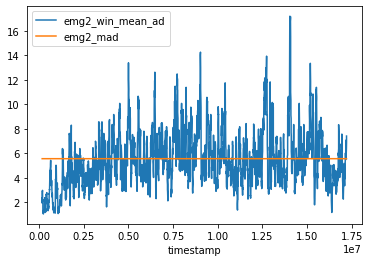

In [5]:
col = 'emg2'
emg[[col+'_win_mean_ad',col+'_mad']].plot()

In [6]:
activity = eul['pitch'].copy()

In [7]:
for i in range(activity.size):
    sum_win_mad = 0
    for col in ['x','y','z']:
        if(gyro[col+'_win_mean_ad'].iloc[i]>gyro[col+'_mad'].iloc[i]):
            sum_win_mad = 1 
    for col in ['x','y','z']:
        if(acc[col+'_win_mean_ad'].iloc[i]>acc[col+'_mad'].iloc[i]):
            sum_win_mad = 1 
    #for col in ['emg1','emg2','emg3','emg4',
    #           'emg5','emg6','emg7','emg8']:
    #    if(emg[col+'_win_mean_ad'].iloc[i]>emg[col+'_mad'].iloc[i]):
    #        sum_win_mad = 1 

    activity.iloc[i] = sum_win_mad

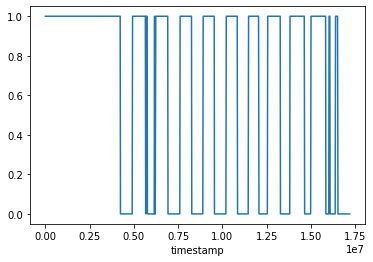

In [8]:
activity.plot()

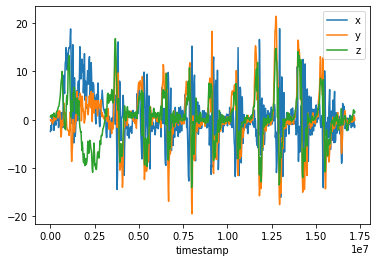

In [9]:
gyro[['x','y','z']].plot()

In [10]:
inactive_timestamps = activity[activity.values == 0 ].index.values

In [11]:
cleaned_emg = emg[['emg1','emg2','emg3','emg4',
                  'emg5','emg6','emg7','emg8']]
cleaned_gyro = gyro[['x','y','z']]
cleaned_gyro.rename(columns = {'x':'gyro_x','y':'gyro_y','z':'gyro_z'},inplace = True)
cleaned_orin = orin[['x','y','z','w']]
cleaned_orin.rename(columns = {'x':'orin_x','y':'orin_y','z':'orin_z','w':'orin_w'},inplace = True)
cleaned_eul = eul[['roll','pitch','yaw']]
cleaned_acc = acc[['x','y','z']]
cleaned_acc.rename(columns = {'x':'acc_x','y':'acc_y','z':'acc_z'},inplace = True)
beeg_df = pd.concat([cleaned_gyro,cleaned_orin,cleaned_eul,cleaned_acc],axis = 1)
beeg_df['Key'] = KEY

/home/judah/anaconda3/envs/tf/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [12]:
lis = [beeg_df]
for timestamp in inactive_timestamps:
    new_lis = []
    for i in range(len(lis)):
        curr = lis[i]
        if(not (curr.index[0] > timestamp or curr.index[-1] < timestamp)):
            before = curr.loc[:timestamp-1]
            after = curr.loc[timestamp+1:]
            if(before.size > 0):
                new_lis.append(before)
            if(after.size > 0):
                new_lis.append(after)
        else:
            new_lis.append(curr)
    lis = new_lis
    
emg_lis = [cleaned_emg]
for timestamp in inactive_timestamps:
    new_lis = []
    for i in range(len(emg_lis)):
        curr = emg_lis[i]
        if(not (curr.index[0] > timestamp or curr.index[-1] < timestamp)):
            before = curr.loc[:timestamp-1]
            after = curr.loc[timestamp+1:]
            if(before.size > 0):
                new_lis.append(before)
            if(after.size > 0):
                new_lis.append(after)
        else:
            new_lis.append(curr)
    emg_lis = new_lis

In [13]:
lis.sort(key = lambda df:-df.size)
emg_lis.sort(key = lambda df:-df.size)

In [14]:
lis = lis[0:10]
emg_lis = emg_lis[0:10]

In [15]:
i = 40
j = 0
for point in lis:
    i = i + 1
    point.to_csv('./q2/all_phys_data_points/phys_'+str(i)+'.csv')
    emg_lis[j].to_csv('./q2/all_emg_data_points/emg_'+str(i)+'.csv')
    j = j + 1

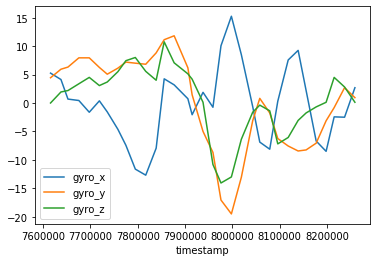

In [23]:
lis[6][['gyro_x','gyro_y','gyro_z']].plot()